<a href="https://colab.research.google.com/github/Rukawuba/StarPlex/blob/master/Another_copy_of_NBA_HOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nba_api



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
import pandas as pd

# Fetch all players
all_players = players.get_players()




Can we predict what NBA players will be in the Hall of Fame? The purpose of this model

In [ ]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
import pandas as pd

# Fetch all player IDs
all_players = players.get_players()
player_ids = [player['id'] for player in all_players]

# Initialize an empty DataFrame to store all players' stats
all_players_stats = pd.DataFrame()

# Fetch season-by-season statistics for each player and filter for seasons from 1980 onwards
for player_id in player_ids:
    player_career = playercareerstats.PlayerCareerStats(player_id=player_id)
    player_career_df = player_career.get_data_frames()[0]

    # Filter for seasons from 1980 onwards
    player_career_df = player_career_df[player_career_df['SEASON_ID'] >= '1980']

    # Append player's stats to the DataFrame
    all_players_stats = all_players_stats.append(player_career_df, ignore_index=True)

# Save the DataFrame to a CSV file
all_players_stats.to_csv('all_players_stats_1980_present.csv', index=False)


Streaming output truncated to the last 5000 lines.
<ipython-input-6-2b54d914cb95>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_players_stats = all_players_stats.append(player_career_df, ignore_index=True)
<ipython-input-6-2b54d914cb95>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_players_stats = all_players_stats.append(player_career_df, ignore_index=True)
<ipython-input-6-2b54d914cb95>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_players_stats = all_players_stats.append(player_career_df, ignore_index=True)
<ipython-input-6-2b54d914cb95>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_players_stats = all

In [ ]:
all_players_stats

NameError: name 'all_players_stats' is not defined

In [3]:
import pandas as pd
merged_df = pd.read_csv('/content/merged_df.csv')

In [4]:
merged_df.columns


Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Player Name', 'HOF'],
      dtype='object')

In [5]:
import pandas as pd

# Assuming df is your DataFrame
# Example data (replace with your actual DataFrame)


# Count the number of entries (rows) for each player
season_counts = merged_df.groupby('PLAYER_ID').size()

# Convert the series to a DataFrame and reset the index
season_counts_df = season_counts.reset_index(name='TotalSeasons')

# Merge this count back into the original DataFrame
df = merged_df.merge(season_counts_df, on='PLAYER_ID')

df
df.to_csv('seasons_df.csv', index=False)




In [6]:
df.to_csv('seasons_df.csv', index=False)


In [ ]:
from google.colab import files

files.download('seasons_df.csv')


In [7]:
df

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,Player Name,HOF,TotalSeasons
0,76001,1990-91,0,1610612757,POR,23.0,43,0.0,290.0,55,...,89.0,12,4.0,12.0,22.0,39,135,Alaa Abdelnaby,0,9
1,76001,1991-92,0,1610612757,POR,24.0,71,1.0,934.0,178,...,260.0,30,25.0,16.0,66.0,132,432,Alaa Abdelnaby,0,9
2,76001,1992-93,0,1610612749,MIL,25.0,12,0.0,159.0,26,...,37.0,10,6.0,4.0,13.0,24,64,Alaa Abdelnaby,0,9
3,76001,1992-93,0,1610612738,BOS,25.0,63,52.0,1152.0,219,...,300.0,17,19.0,22.0,84.0,165,514,Alaa Abdelnaby,0,9
4,76001,1992-93,0,0,TOT,25.0,75,52.0,1311.0,245,...,337.0,27,25.0,26.0,97.0,189,578,Alaa Abdelnaby,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23338,1627826,2019-20,0,1610612746,LAC,23.0,72,70.0,1326.0,236,...,543.0,82,16.0,66.0,61.0,168,596,Ivica Zubac,0,10
23339,1627826,2020-21,0,1610612746,LAC,24.0,72,33.0,1609.0,257,...,519.0,90,24.0,62.0,81.0,187,650,Ivica Zubac,0,10
23340,1627826,2021-22,0,1610612746,LAC,25.0,76,76.0,1852.0,310,...,644.0,120,36.0,77.0,114.0,203,785,Ivica Zubac,0,10
23341,1627826,2022-23,0,1610612746,LAC,26.0,76,76.0,2169.0,326,...,756.0,77,29.0,98.0,117.0,219,818,Ivica Zubac,0,10


In [8]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Example data (use your actual DataFrame instead)



# Specify the columns you want to sum
columns_to_sum = ['GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS']  # Update this list with your actual column names



# Group by PLAYER_ID and aggregate
aggregated_stats = df.groupby('PLAYER_ID').agg({
    'PLAYER_ID':'first',
    'Player Name': 'first',  # Keep the full name of each player
    'HOF': 'first',          # Keep the HOF status for each player
    **{col: 'sum' for col in columns_to_sum},  # Sum the specified columns
    'TotalSeasons': 'size',  # Count the number of entries for each player
})

aggregated_stats.head(25)

#aggregated_stats.to_csv('NBA_full_data.csv', index = False)


,PLAYER_ID,Player Name,HOF,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,TotalSeasons
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
2,2,Byron Scott,0,1073,717.0,30152.0,5918,12268,6.650,775.0,...,677.0,2310.0,2987.0,2729,1224.0,276.0,1597.0,2051,15097,14
3,3,Grant Long,0,1084,752.0,31159.0,3814,8156,7.704,94.0,...,2359.0,4401.0,6760.0,1847,1308.0,400.0,1783.0,3200,10457,17
7,7,Dan Schayes,0,1256,483.0,24623.0,3364,7061,9.751,4.0,...,2050.0,4335.0,6385.0,1517,624.0,948.0,1848.0,3864,9777,22
9,9,Sedale Threatt,0,1090,312.0,24938.0,4369,9034,8.526,198.0,...,420.0,1485.0,1905.0,4032,1272.0,157.0,1448.0,2442,10399,18
12,12,Chris King,0,103,66.0,2058.0,271,640,1.109,46.0,...,108.0,203.0,311.0,116,74.0,34.0,119.0,183,693,3
15,15,Eric Piatkowski,0,789,250.0,14613.0,2044,4711,5.862,865.0,...,508.0,1208.0,1716.0,778,404.0,115.0,628.0,1152,5919,14
17,17,Clyde Drexler,1,1162,1025.0,40266.0,8906,18911,7.924,974.0,...,2767.0,4390.0,7157.0,6487,2343.0,764.0,3163.0,3491,23848,17
21,21,Greg Anthony,0,817,265.0,17364.0,2097,5225,5.208,658.0,...,293.0,1256.0,1549.0,3279,964.0,84.0,1137.0,1438,5971,13
22,22,Rik Smits,0,867,792.0,23102.0,5301,10461,6.067,3.0,...,1531.0,3746.0,5277.0,1215,372.0,1111.0,1579.0,3011,12871,12


In [156]:
aggregated_stats.columns


Index(['PLAYER_ID', 'Player Name', 'HOF', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TotalSeasons'],
      dtype='object')

In [157]:
aggregated_stats.to_csv('NBA_full_data.csv', index = False)


In [ ]:
from google.colab import files

files.download('NBA_full_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [158]:
aggregated_stats.columns


Index(['PLAYER_ID', 'Player Name', 'HOF', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TotalSeasons'],
      dtype='object')

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['HOF', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
                    'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
                    'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TotalSeasons']
df_selected = df[selected_columns]


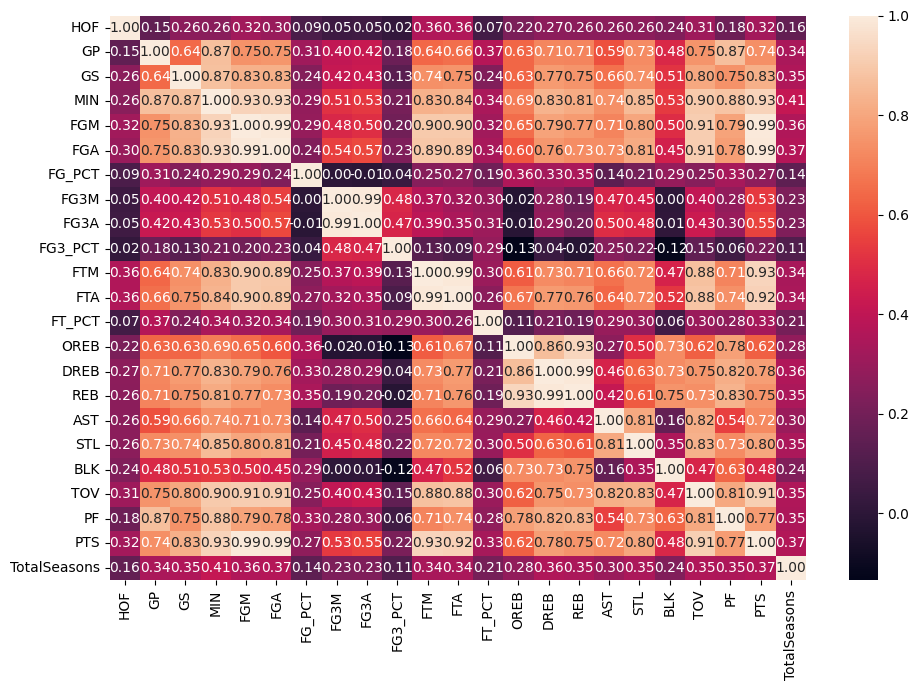

In [160]:
# Setting up the matplotlib figure
fig, axis = plt.subplots(figsize=(10, 7))

# Draw the heatmap
sns.heatmap(df_selected.corr(), annot=True, fmt=".2f")

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()


In [161]:
aggregated_stats.describe()

,PLAYER_ID,HOF,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,TotalSeasons
count,3.527000e+03,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,...,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000
mean,4.506475e+05,0.022115,312.664871,146.449674,7266.419337,1165.492487,2526.151971,2.890964,176.783952,501.365750,...,363.242983,918.917210,1282.160193,697.263397,239.465268,149.958605,443.585767,664.378225,3081.616955,6.618373
std,6.664352e+05,0.147079,345.076806,247.373783,9933.067990,1793.630493,3824.603583,2.596131,376.141364,1019.110338,...,606.338479,1441.121974,2015.242387,1296.356965,366.382779,311.854576,662.365447,852.274706,4794.325488,5.600784
min,2.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.228500e+03,0.000000,36.000000,0.000000,312.500000,37.000000,93.000000,0.760000,0.000000,5.000000,...,14.000000,33.000000,48.000000,19.000000,9.000000,4.000000,19.000000,37.000000,96.000000,2.000000
50%,7.823300e+04,0.000000,165.000000,21.000000,2433.000000,317.000000,729.000000,2.027000,10.000000,44.000000,...,102.000000,270.000000,379.000000,157.000000,74.000000,32.000000,136.000000,258.000000,835.000000,5.000000
75%,2.039625e+05,0.000000,512.000000,180.000000,11071.000000,1582.000000,3441.500000,4.557000,137.000000,429.500000,...,443.000000,1243.000000,1697.000000,779.000000,328.000000,154.000000,604.000000,1047.500000,4096.000000,10.000000
max,1.641931e+06,1.000000,1691.000000,1475.000000,55399.000000,14505.000000,28718.000000,13.402000,3557.000000,8603.000000,...,4754.000000,11716.000000,15091.000000,15806.000000,3265.000000,3830.000000,5093.000000,4856.000000,39591.000000,28.000000


In [147]:
aggregated_stats.columns

Index(['PLAYER_ID', 'Player Name', 'HOF', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TotalSeasons'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame with player names and IDs
player_mapping_df = aggregated_stats[['Player Name', 'PLAYER_ID']].drop_duplicates()

# If you want to reset the index of the new DataFrame
player_mapping_df = player_mapping_df.reset_index(drop=True)


In [ ]:
# Assuming 'Player Name' and 'Player ID' are columns in your DataFrame
name_to_id_mapping = aggregated_stats.set_index('Player Name')['PLAYER_ID'].to_dict()
import pickle

with open('name_to_id_mapping.pkl', 'wb') as file:
    pickle.dump(name_to_id_mapping, file)


In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
num_variables = ["GP", "GS", "MIN", "FGM", "FG_PCT", "FG3M",
        "FTM", "REB", "AST","STL", "BLK", "PTS", "TotalSeasons"]

# We divide the dataset into training and test samples
X = aggregated_stats.drop("HOF", axis = 1)[num_variables]
y = aggregated_stats["HOF"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,GP,GS,MIN,FGM,FG_PCT,FG3M,FTM,REB,AST,STL,BLK,PTS,TotalSeasons
PLAYER_ID,,,,,,,,,,,,,
1136,70,24.0,665.0,54,0.446,0.0,45,165.0,17,16.0,32.0,153,1
1630554,14,0.0,124.0,18,0.439,5.0,0,22.0,27,2.0,0.0,41,1
203580,32,1.0,359.0,34,1.133,10.0,2,21.0,65,6.0,0.0,80,4
77800,144,0.0,2216.0,307,0.965,0.0,142,371.0,195,106.0,23.0,756,2
77130,505,296.0,11849.0,1922,3.421,7.0,766,1760.0,856,404.0,252.0,4617,7


In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,GP,GS,MIN,FGM,FG_PCT,FG3M,FTM,REB,AST,STL,BLK,PTS,TotalSeasons
PLAYER_ID,,,,,,,,,,,,,
1136,-0.691881,-0.482485,-0.652173,-0.602601,-0.932358,-0.460960,-0.510600,-0.538241,-0.515600,-0.596879,-0.370637,-0.593820,-0.998110
1630554,-0.855251,-0.579069,-0.706804,-0.622530,-0.935077,-0.447615,-0.555122,-0.608128,-0.507925,-0.635060,-0.471752,-0.617027,-0.998110
203580,-0.802739,-0.575045,-0.683074,-0.613673,-0.665505,-0.434269,-0.553144,-0.608617,-0.478760,-0.624152,-0.471752,-0.608946,-0.456045
77800,-0.476000,-0.579069,-0.495552,-0.462543,-0.730762,-0.460960,-0.414628,-0.437564,-0.378986,-0.351431,-0.399076,-0.468874,-0.817422
77130,0.577150,0.612137,0.477199,0.431505,0.223229,-0.442276,0.202755,0.241270,0.128328,0.461277,0.324525,0.331150,0.086021


In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler




# Load your dataset
test_data = pd.read_csv('clean_test.csv')
train_data = pd.read_csv('clean_train.csv')

# Split the dataset into features (X) and target variable (y)

X = train_data.drop('HOF', axis=1)
y = train_data['HOF']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Concatenate the features and target variable for the training data
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['HOF'] == 'majority']
minority_class = train_data[train_data['HOF'] == 'minority']

# Downsample the majority class to match the number of instances in the minority class
majority_downsampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_class),
                                random_state=42)

# Combine minority class with downsampled majority class
downsampled_data = pd.concat([majority_downsampled, minority_class])

# Separate features and target variable for the downsampled data
X_train_downsampled = downsampled_data.drop('HOF', axis=1)
y_train_downsampled = downsampled_data['HOF']



print(X_train_downsampled)
print(y_train_downsampled)
# Train your machine learning model on the downsampled data
#model = LogisticRegression()
#model.fit(X_train_downsampled, y_train_downsampled)

# Evaluate your model on the original testing data
#accuracy = model.score(X_test, y_test)
#print("Model Accuracy on Test Data:", accuracy)

# Save your trained model to a file
#joblib.dump(model, 'your_model.pkl')


Empty DataFrame
Columns: [GS, MIN, FGM, FTM, REB, AST, STL, PTS]
Index: []
Series([], Name: HOF, dtype: int64)


In [164]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,GP,GS,MIN,FGM,FG_PCT,FG3M,FTM,REB,AST,STL,BLK,PTS,TotalSeasons
PLAYER_ID,,,,,,,,,,,,,
1136,0.040828,0.016304,0.012004,0.003723,0.033501,0.000000,0.004598,0.010934,0.001076,0.004900,0.008355,0.003865,0.000000
1630554,0.007692,0.000000,0.002238,0.001241,0.032975,0.001406,0.000000,0.001458,0.001708,0.000613,0.000000,0.001036,0.000000
203580,0.018343,0.000679,0.006480,0.002344,0.085105,0.002811,0.000204,0.001392,0.004112,0.001838,0.000000,0.002021,0.115385
77800,0.084615,0.000000,0.040001,0.021165,0.072486,0.000000,0.014509,0.024584,0.012337,0.032466,0.006005,0.019095,0.038462
77130,0.298225,0.201087,0.213885,0.132506,0.256967,0.001968,0.078267,0.116626,0.054157,0.123737,0.065796,0.116617,0.230769


In [165]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 8)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,GS,MIN,FGM,FTM,REB,AST,STL,PTS
0,24.0,665.0,54.0,45.0,165.0,17.0,16.0,153.0
1,0.0,124.0,18.0,0.0,22.0,27.0,2.0,41.0
2,1.0,359.0,34.0,2.0,21.0,65.0,6.0,80.0
3,0.0,2216.0,307.0,142.0,371.0,195.0,106.0,756.0
4,296.0,11849.0,1922.0,766.0,1760.0,856.0,404.0,4617.0


In [166]:
X_train_sel["HOF"] = list(y_train)
X_test_sel["HOF"] = list(y_test)
X_train_sel.to_csv("clean_train.csv", index=False)
X_test_sel.to_csv("clean_test.csv", index=False)

In [167]:
train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")


In [168]:
train_data.head()

,GS,MIN,FGM,FTM,REB,AST,STL,PTS,HOF
0,24.0,665.0,54.0,45.0,165.0,17.0,16.0,153.0,0
1,0.0,124.0,18.0,0.0,22.0,27.0,2.0,41.0,0
2,1.0,359.0,34.0,2.0,21.0,65.0,6.0,80.0,0
3,0.0,2216.0,307.0,142.0,371.0,195.0,106.0,756.0,0
4,296.0,11849.0,1922.0,766.0,1760.0,856.0,404.0,4617.0,0


In [169]:
X_train = train_data.drop(["HOF"], axis = 1)
y_train = train_data["HOF"]
X_test = test_data.drop(["HOF"], axis = 1)
y_test = test_data["HOF"]

In [179]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [171]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9787535410764873

In [172]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [173]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


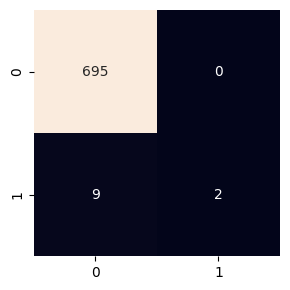

In [180]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

hof_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(hof_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [175]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Testing):", mse_test)

Mean Squared Error (Training): 0.01722604929893486
Mean Squared Error (Testing): 0.011576716009188168


In [176]:
# Evaluate the new performance with recall and precision metrics
from sklearn.metrics import recall_score, precision_score

recall = recall_score(y_test, new_predictions)
precision = precision_score(y_test, new_predictions)

print(f"Recall with adjusted threshold: {recall}")
print(f"Precision with adjusted threshold: {precision}")

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy


Recall with adjusted threshold: 0.18181818181818182
Precision with adjusted threshold: 0.25


0.9872521246458924

In [177]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[689   6]
 [  9   2]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       695
           1       0.25      0.18      0.21        11

    accuracy                           0.98       706
   macro avg       0.62      0.59      0.60       706
weighted avg       0.98      0.98      0.98       706



In [ ]:
y_pred = model.predict(X_test)
y_pred

In [132]:
accuracy_score(y_test, y_pred)


0.9787535410764873

In [79]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [101]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9759206798866855

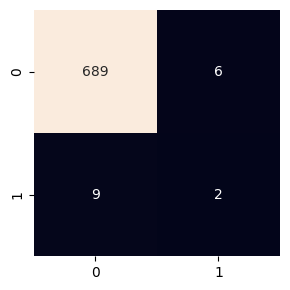

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

hof_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(hof_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
!pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have your features X and target variable y already prepared
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Calculate the mean squared error for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Testing):", mse_test)


Mean Squared Error (Training): 0.01722604929893486
Mean Squared Error (Testing): 0.011576716009188168


In [189]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle



model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

from sklearn.linear_model import LogisticRegression

# Load your data and train the model...
THRESHOLD = 0.50



# Set the new threshold
model.decision_threshold_ = THRESHOLD

# Predict with the adjusted threshold
new_predictions = model.predict(X_test)

# Evaluate the new performance with recall and precision metrics
from sklearn.metrics import recall_score, precision_score

recall = recall_score(y_test, new_predictions)
precision = precision_score(y_test, new_predictions)

#print(f"Recall with adjusted threshold: {recall}")
#print(f"Precision with adjusted threshold: {precision}")

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

# Save the trained model to a file using pickle
with open("lr_w_threshold.pkl", "wb") as file:
    pickle.dump(model, file)

# Download the saved model
from google.colab import files
files.download("lr_w_threshold.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [184]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.9759206798866855

In [185]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[684  11]
 [  6   5]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       695
           1       0.31      0.45      0.37        11

    accuracy                           0.98       706
   macro avg       0.65      0.72      0.68       706
weighted avg       0.98      0.98      0.98       706



In [106]:
from sklearn.model_selection import GridSearchCV

# We define the parameters by hand that we want to adjust
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [91]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import pickle

# Assuming df is your DataFrame with features and 'hall_of_fame' is the target column


#X_train = X_train_sel.drop(["HOF"], axis = 1)
#y_train = X_train_sel["HOF"]
#X_test = X_test_sel.drop(["HOF"], axis = 1)
#y_test = X_test_sel["HOF"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

# Save the model
#with open('hall_of_fame_model.pkl', 'wb') as file:
 #   pickle.dump(model, file)





Accuracy: 0.9858356940509915


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import pickle

# Assuming df is your DataFrame with features and 'hall_of_fame' is the target column
X = aggregated_stats.drop(['HOF','Player Name'], axis=1)  # features
y = aggregated_stats['HOF']  # target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

# Save the model
with open('hall_of_fame_model.pkl1', 'wb') as file:
    pickle.dump(model, file)


Accuracy: 0.9886685552407932


In [30]:
aggregated_stats.columns

Index(['PLAYER_ID', 'Player Name', 'HOF', 'GP', 'GS', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'TotalSeasons'],
      dtype='object')

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import pickle


In [32]:
# Replace 'features' and 'target' with your actual column names
X = aggregated_stats.drop(['HOF','Player Name'], axis=1)
y = aggregated_stats['HOF']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Feature selection
selector = SelectKBest(f_classif, k=6)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['FGM', 'FGA', 'FTM', 'FTA', 'TOV', 'PTS'], dtype='object')


In [35]:
# Initialize and train the model with selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)


RandomForestClassifier(random_state=42)

In [96]:
# Make predictions and evaluate the model
predictions = model.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, predictions))


ValueError: X has 6 features, but LogisticRegression is expecting 13 features as input.

In [97]:
from sklearn.model_selection import cross_val_score
import numpy as np

model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5)  # cv is the number of folds
print("Cross-validated scores:", scores)
print("Average score:", np.mean(scores))


Cross-validated scores: [0.98016997 0.9815864  0.98014184 0.97163121 0.97730496]
Average score: 0.978166877624415


In [38]:
model.fit(X_train, y_train)
importances = model.feature_importances_
# Now you can print or plot the feature importances.

importances

array([0.04444278, 0.03925942, 0.06175774, 0.03947836, 0.06222932,
       0.03841568, 0.04353599, 0.02416126, 0.02541919, 0.02291704,
       0.07019121, 0.05852735, 0.0439788 , 0.0336648 , 0.04691615,
       0.0399165 , 0.03923319, 0.03855723, 0.03895582, 0.06753819,
       0.02098302, 0.06071492, 0.03920601])

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[694   1]
 [  7   4]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       695
           1       0.80      0.36      0.50        11

    accuracy                           0.99       706
   macro avg       0.90      0.68      0.75       706
weighted avg       0.99      0.99      0.99       706



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    # Add other parameters here
}

grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'n_estimators': 200}


In [40]:
feature_importances = model.feature_importances_
features = X_train.columns
importances = model.feature_importances_
feature_importance_dict = dict(zip(features, importances))



In [41]:
import pandas as pd

feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})


In [42]:
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)


         Feature  Importance
10           FTM    0.070191
19           TOV    0.067538
4            FGM    0.062229
2             GS    0.061758
21           PTS    0.060715
11           FTA    0.058527
14          DREB    0.046916
0      PLAYER_ID    0.044443
12        FT_PCT    0.043979
6         FG_PCT    0.043536
15           REB    0.039917
3            MIN    0.039478
1             GP    0.039259
16           AST    0.039233
22  TotalSeasons    0.039206
18           BLK    0.038956
17           STL    0.038557
5            FGA    0.038416
13          OREB    0.033665
8           FG3A    0.025419
7           FG3M    0.024161
9        FG3_PCT    0.022917
20            PF    0.020983


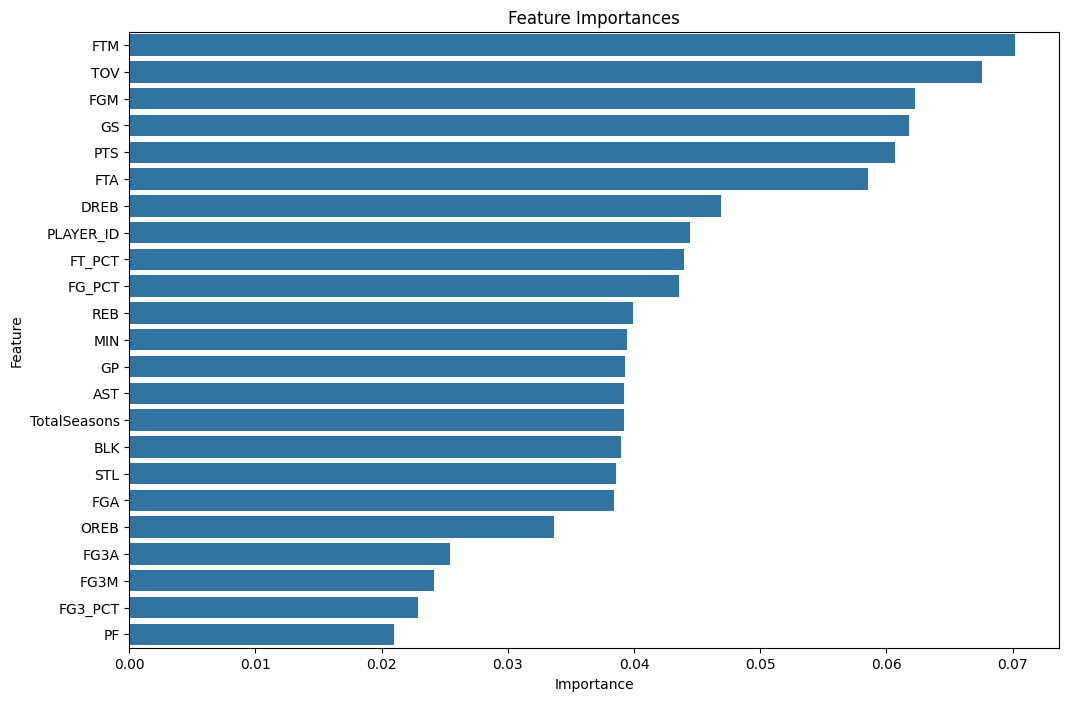

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame

def summarize_dataframe(dataframe):
    print("Basic Descriptive Statistics:")
    print(dataframe.describe())  # Basic descriptive statistics

    print("\nData Types:")
    print(dataframe.dtypes)  # Data types of columns

    print("\nMean Values:")
    print(dataframe.mean())  # Mean of columns

    print("\nMode Values:")
    print(dataframe.mode().iloc[0])  # Mode of columns

    print("\nStandard Deviations:")
    print(dataframe.std())  # Standard deviation of columns

    print("\nSkewness:")
    print(dataframe.skew())  # Skewness of columns

    print("\nKurtosis:")
    print(dataframe.kurtosis())  # Kurtosis of columns

    print("\nCorrelation Matrix:")
    print(dataframe.corr())  # Correlation matrix

# Call the function with your DataFrame
summarize_dataframe(df)
